In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/dipikagurtu/Desktop/project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/dipikagurtu/Desktop/project/test_data.csv
/home/dipikagurtu/Desktop/project/train_data_dictionary.csv
/home/dipikagurtu/Desktop/project/sample_sub.csv
/home/dipikagurtu/Desktop/project/.~lock.train_data.csv#
/home/dipikagurtu/Desktop/project/train_data.csv


In [ ]:
pip install auto-sklearn

In [10]:
import autosklearn.classification

# Load Data

In [69]:
train= pd.read_csv('/home/dipikagurtu/Desktop/project/train_data.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [70]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [72]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [73]:
train.iloc[271460]['Bed Grade']

3.0

In [74]:
train[['Bed Grade']]

,Bed Grade
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
318433,4.0
318434,4.0
318435,4.0
318436,3.0


In [75]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [76]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [77]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

**These columns are of no use**

In [78]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [79]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [80]:
train.iloc[271460]['Bed Grade']

3.0

In [81]:
train[['Bed Grade']]

,Bed Grade
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
318433,4.0
318434,4.0
318435,4.0
318436,3.0


**Dividing the columns into categorical and numerical for EDA**

In [82]:
cat_cols=[]
num_cols=[]

for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
        
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
        
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


# Exploratory Data Analysis

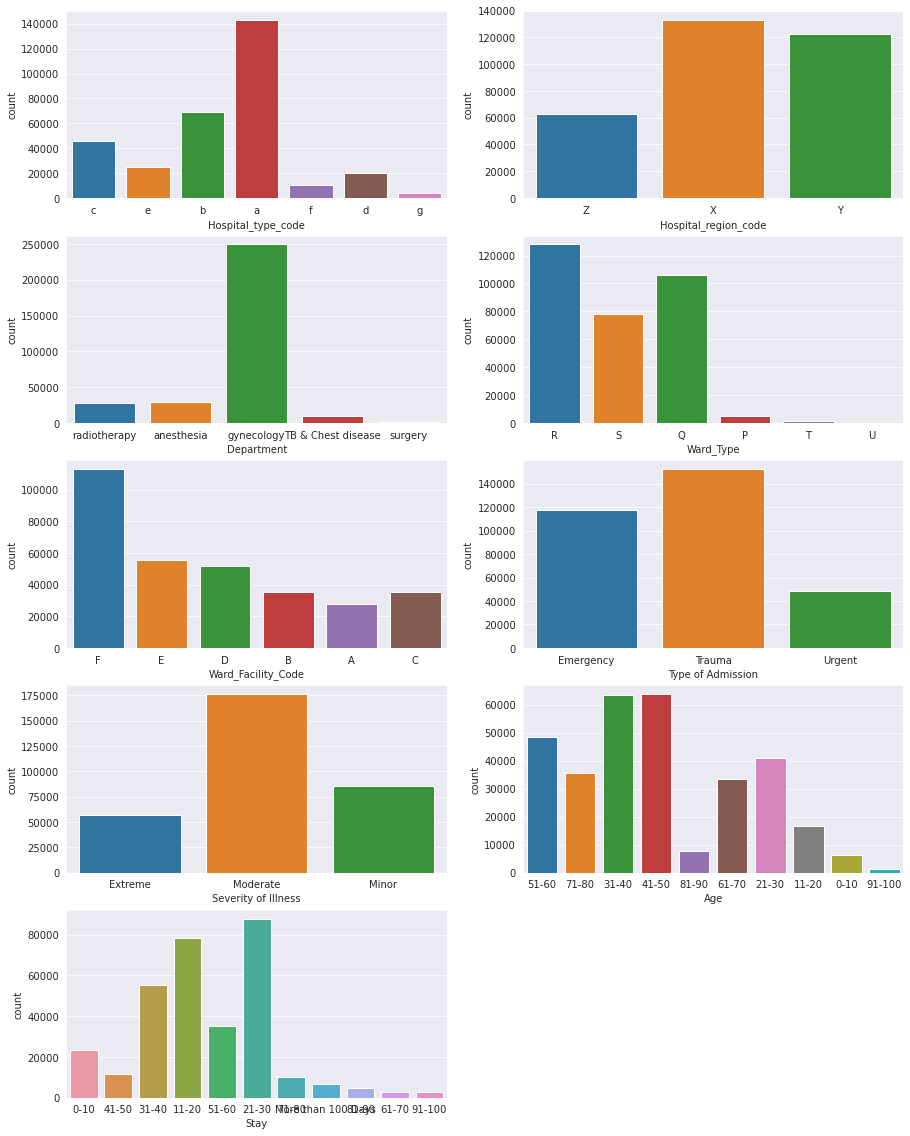

In [83]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

In [84]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [85]:
train['Stay'].replace('More than 100 Days', '>100', inplace=True)

In [86]:
train['Stay'].value_counts()

21-30     87491
11-20     78139
31-40     55159
51-60     35018
0-10      23604
41-50     11743
71-80     10254
>100       6683
81-90      4838
91-100     2765
61-70      2744
Name: Stay, dtype: int64

In [87]:
train.iloc[271460]['Bed Grade']

3.0

In [88]:
train[['Bed Grade']]

,Bed Grade
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
318433,4.0
318434,4.0
318435,4.0
318436,3.0


# Dividing the Labels
**Here, I divide the stay duration into 3 categories**
0: 0-20 days
1: 21-60 days
2: 61-100+ days

You might say why a disproportionate distribution. This is to balance the number of patients in each category

Plus the model will not give good prediction accuracy if there are 11 classes to predict. It would have given good results if there were a proportionate number of rows give, example 1,000,000 but with the amount of data we have, we can get a decent accuracy with 3 labels to predict.

In [89]:
train['Stay']= train['Stay'].replace({'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':1, '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'>100':2})

In [90]:
train['Stay'].value_counts()

1    154393
0    101743
2     62302
Name: Stay, dtype: int64

In [91]:
cat_cols = ['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Bed Grade',
 'City_Code_Hospital',
 'City_Code_Patient']
train[cat_cols].iloc[2]

Hospital_type_code               e
Hospital_region_code             X
Department              anesthesia
Ward_Type                        S
Ward_Facility_Code               E
Type of Admission           Trauma
Severity of Illness        Extreme
Age                          51-60
Stay                             1
Bed Grade                      2.0
City_Code_Hospital               1
City_Code_Patient              7.0
Name: 2, dtype: object

# More EDA

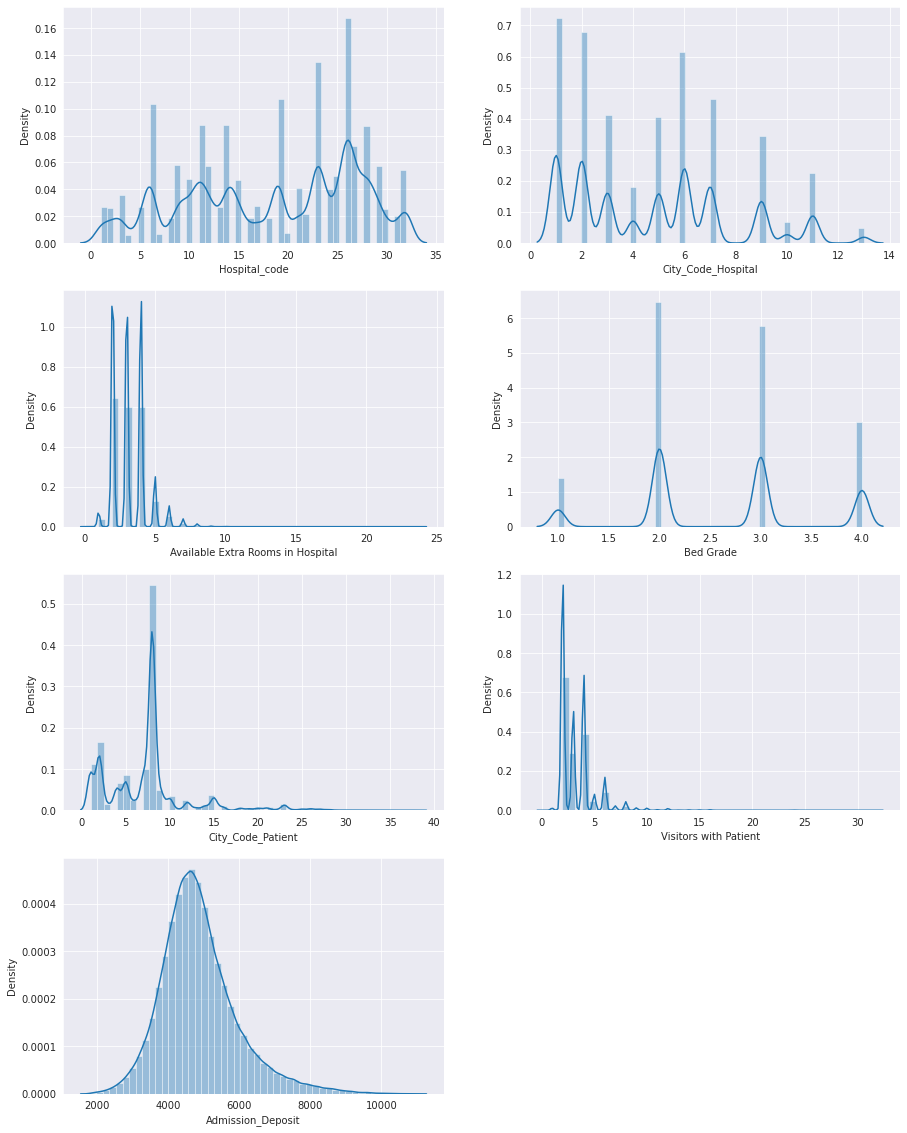

In [92]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.distplot(train[col])
    i=i+1
    
plt.show()
   

In [93]:
train.iloc[271460]['Bed Grade']

3.0

In [94]:
train['Bed Grade']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
318433    4.0
318434    4.0
318435    4.0
318436    3.0
318437    2.0
Name: Bed Grade, Length: 318438, dtype: float64

In [95]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Bed Grade',
 'City_Code_Hospital',
 'City_Code_Patient']

**I found that some columns in numerical category were actually categorical columns. So I shifted them to the category**

# Encoding Categorical Columns

In [96]:
import joblib
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
# for col in cat_cols:
for col in cat_cols: 
    print(train[col])
    train[col]= le.fit_transform(train[col])
    print(train[col])
    joblib.dump(le, col + '_label_encoder.joblib')

0         c
1         c
2         e
3         b
4         b
         ..
318433    a
318434    a
318435    a
318436    b
318437    a
Name: Hospital_type_code, Length: 318438, dtype: object
0         2
1         2
2         4
3         1
4         1
         ..
318433    0
318434    0
318435    0
318436    1
318437    0
Name: Hospital_type_code, Length: 318438, dtype: int64
0         Z
1         Z
2         X
3         Y
4         Y
         ..
318433    X
318434    X
318435    X
318436    Y
318437    Y
Name: Hospital_region_code, Length: 318438, dtype: object
0         2
1         2
2         0
3         1
4         1
         ..
318433    0
318434    0
318435    0
318436    1
318437    1
Name: Hospital_region_code, Length: 318438, dtype: int64
0         radiotherapy
1         radiotherapy
2           anesthesia
3         radiotherapy
4         radiotherapy
              ...     
318433    radiotherapy
318434      anesthesia
318435      gynecology
318436      anesthesia
318437      gyne

In [97]:
hospital_type_code_label_encoder = joblib.load('Hospital_type_code_label_encoder.joblib')
hospital_region_code_label_encoder = joblib.load('Hospital_region_code_label_encoder.joblib')
department_label_encoder = joblib.load('Department_label_encoder.joblib')
ward_Type_label_encoder = joblib.load('Ward_Type_label_encoder.joblib')
ward_Facility_Code_label_encoder = joblib.load('Ward_Facility_Code_label_encoder.joblib')
typeofAdmission_label_encoder = joblib.load('Type of Admission_label_encoder.joblib')
severityofIllness_label_encoder = joblib.load('Severity of Illness_label_encoder.joblib')
age_label_encoder = joblib.load('Age_label_encoder.joblib')
stay_label_encoder = joblib.load('Stay_label_encoder.joblib')

In [98]:
bedGrade_label_encoder = joblib.load('Bed Grade_label_encoder.joblib')
city_Code_Hospital_label_encoder = joblib.load('City_Code_Hospital_label_encoder.joblib')
city_Code_Patient_label_encoder = joblib.load('City_Code_Patient_label_encoder.joblib')

In [99]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Bed Grade',
 'City_Code_Hospital',
 'City_Code_Patient']

In [100]:
print(hospital_type_code_label_encoder.transform(pd.Series(['b'])))
print(hospital_region_code_label_encoder.transform(pd.Series(['Y'])))
print(department_label_encoder.transform(pd.Series(['gynecology'])))
print(ward_Type_label_encoder.transform(pd.Series(['Q'])))
print(ward_Facility_Code_label_encoder.transform(pd.Series(['D'])))
print(typeofAdmission_label_encoder.transform(pd.Series(['Trauma'])))
print(severityofIllness_label_encoder.transform(pd.Series(['Moderate'])))
print(age_label_encoder.transform(pd.Series(['61-70'])))
print(stay_label_encoder.transform(pd.Series([1])))

[1]
[1]
[2]
[1]
[3]
[1]
[2]
[6]
[1]


In [101]:
print(bedGrade_label_encoder.transform(pd.Series([3.0])))
print(city_Code_Hospital_label_encoder.transform(pd.Series([2])))
print(city_Code_Patient_label_encoder.transform(pd.Series([21.0])))

[2]
[1]
[19]


In [102]:
train[cat_cols].iloc[271460]

Hospital_type_code       1
Hospital_region_code     1
Department               2
Ward_Type                1
Ward_Facility_Code       3
Type of Admission        1
Severity of Illness      2
Age                      6
Stay                     1
Bed Grade                2
City_Code_Hospital       1
City_Code_Patient       19
Name: 271460, dtype: int64

In [103]:
c = pd.read_csv('/home/dipikagurtu/Desktop/project/train_data.csv')
c.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [104]:
c['Bed Grade'].fillna(statistics.mode(c['Bed Grade']),inplace=True)
c['City_Code_Patient'].fillna(statistics.mode(c['City_Code_Patient']),inplace=True)

In [105]:
c.iloc[271460]

case_id                                  271461
Hospital_code                                11
Hospital_type_code                            b
City_Code_Hospital                            2
Hospital_region_code                          Y
Available Extra Rooms in Hospital             3
Department                           gynecology
Ward_Type                                     Q
Ward_Facility_Code                            D
Bed Grade                                   3.0
patientid                                 86486
City_Code_Patient                          21.0
Type of Admission                        Trauma
Severity of Illness                    Moderate
Visitors with Patient                         3
Age                                       61-70
Admission_Deposit                        6280.0
Stay                                      21-30
Name: 271460, dtype: object

In [106]:
train[cat_cols]

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay,Bed Grade,City_Code_Hospital,City_Code_Patient
0,2,2,3,2,5,0,0,5,0,1,2,6
1,2,2,3,3,5,1,0,5,1,1,4,6
2,4,0,1,3,4,1,0,5,1,1,0,6
3,1,1,3,2,3,1,0,5,1,1,1,6
4,1,1,3,3,3,1,0,5,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
318433,0,0,3,1,5,0,2,4,0,3,5,21
318434,0,0,1,1,4,2,2,8,1,3,0,7
318435,0,0,2,2,5,0,1,7,0,3,3,9
318436,1,1,1,1,3,1,1,1,0,2,1,7


In [107]:
train['City_Code_Hospital'].value_counts()

0     55351
1     51809
5     46991
6     35463
2     31569
4     31105
7     26277
9     17137
3     13857
8      5249
10     3630
Name: City_Code_Hospital, dtype: int64

In [108]:
train['City_Code_Patient'].value_counts()

7     128543
1      38869
0      26377
6      23807
4      20079
3      15380
8      11795
14      8950
9       8174
5       6005
11      5647
2       3772
21      3698
13      2927
15      2254
12      1625
19      1602
18      1409
16      1404
17      1028
24      1023
23       798
25       771
10       658
26       521
20       405
22       360
28       133
27        98
31        78
29        59
35        57
30        52
32        46
33        16
34        12
36         6
Name: City_Code_Patient, dtype: int64

In [109]:
num_cols.remove('Bed Grade')
num_cols.remove('City_Code_Hospital')
num_cols.remove('City_Code_Patient')
num_cols

['Hospital_code',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

<AxesSubplot:>

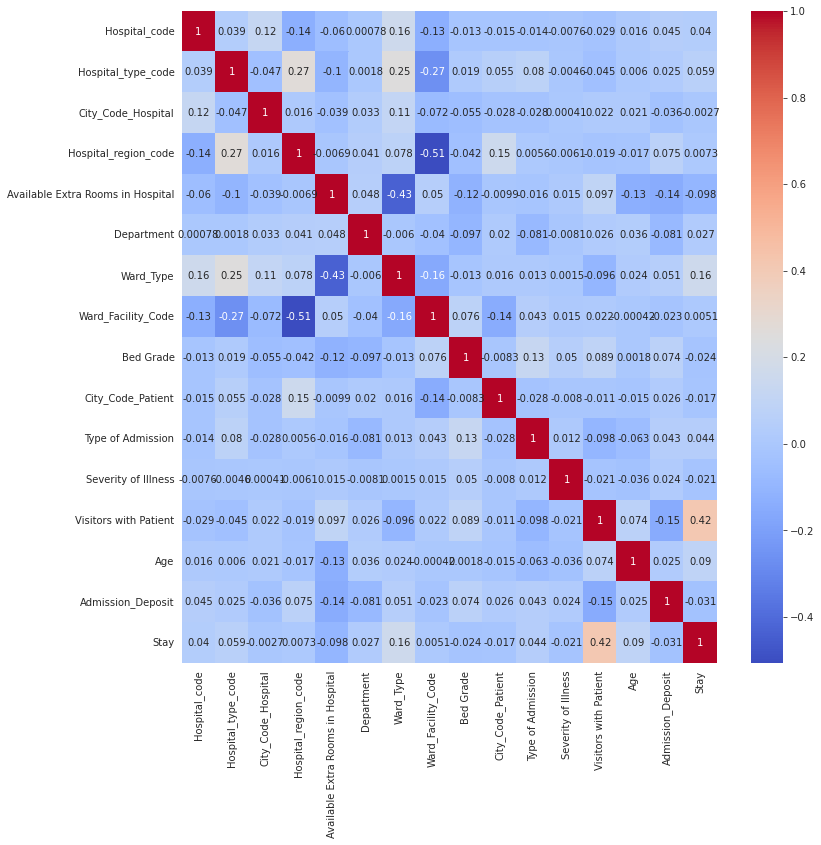

In [110]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [111]:
num_cols

['Hospital_code',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [112]:
train[num_cols].values

array([[8.000e+00, 3.000e+00, 2.000e+00, 4.911e+03],
       [2.000e+00, 2.000e+00, 2.000e+00, 5.954e+03],
       [1.000e+01, 2.000e+00, 2.000e+00, 4.745e+03],
       ...,
       [7.000e+00, 3.000e+00, 3.000e+00, 4.235e+03],
       [1.100e+01, 3.000e+00, 5.000e+00, 3.761e+03],
       [1.900e+01, 5.000e+00, 2.000e+00, 4.752e+03]])

# Scaling Numerical Columns

In [113]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

train[num_cols]= ss.fit_transform(train[num_cols].values)
joblib.dump(ss, 'std_scaler_encoded.joblib')


['std_scaler_encoded.joblib']

In [114]:
sc_encoder = joblib.load('std_scaler_encoded.joblib')

In [115]:
c[num_cols]

,Hospital_code,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit
0,8,3,2,4911.0
1,2,2,2,5954.0
2,10,2,2,4745.0
3,26,2,2,7272.0
4,26,2,2,5558.0
...,...,...,...,...
318433,6,3,3,4144.0
318434,24,2,4,6699.0
318435,7,3,3,4235.0
318436,11,3,5,3761.0


In [116]:
print(c[num_cols].iloc[271460].values)

[1.10e+01 3.00e+00 3.00e+00 6.28e+03]


In [117]:
m = [[c[num_cols].iloc[271460].values[0], c[num_cols].iloc[271460].values[1], c[num_cols].iloc[271460].values[2], c[num_cols].iloc[271460].values[3]]]

In [118]:
print(m)

[[11.0, 3.0, 3.0, 6280.0]]


In [119]:
n = sc_encoder.transform(m)

In [120]:
print(sc_encoder.transform(m))

[[-0.84770211 -0.16917678 -0.16104865  1.28752611]]


In [121]:
print(train[num_cols].iloc[271460].values)

[-0.84770211 -0.16917678 -0.16104865  1.28752611]


In [122]:
pred_args = []
pred_args.append(round(float(n[0][0]),6))
pred_args.append(round(float(hospital_type_code_label_encoder.transform(pd.Series(['b']))[0]),6))
pred_args.append(round(float(city_Code_Hospital_label_encoder.transform(pd.Series([2]))[0]),6))
pred_args.append(round(float(hospital_region_code_label_encoder.transform(pd.Series(['Y']))[0]),6))
pred_args.append(round(float(n[0][1]),6))
pred_args.append(round(float(department_label_encoder.transform(pd.Series(['gynecology']))[0]),6))
pred_args.append(round(float(ward_Type_label_encoder.transform(pd.Series(['Q']))[0]),6))
pred_args.append(round(float(ward_Facility_Code_label_encoder.transform(pd.Series(['D']))[0]),6))
pred_args.append(round(float(bedGrade_label_encoder.transform(pd.Series([3.0]))[0]),6))
pred_args.append(round(float(city_Code_Patient_label_encoder.transform(pd.Series([21.0]))[0]),6))
pred_args.append(round(float(typeofAdmission_label_encoder.transform(pd.Series(['Trauma']))[0]),6))
pred_args.append(round(float(severityofIllness_label_encoder.transform(pd.Series(['Moderate']))[0]),6))
pred_args.append(round(float(n[0][2]),6))
pred_args.append(round(float(age_label_encoder.transform(pd.Series(['61-70']))[0]),6))
pred_args.append(round(float(n[0][3]),6))
#pred_args.append(stay_label_encoder.transform(pd.Series([1]))[0])

# Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
#        'Hospital_region_code', 'Available Extra Rooms in Hospital',
#        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
#        'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
#        'Visitors with Patient', 'Age', 'Admission_Deposit'], 
#       dtype='object')
# round(float(),6)
# Hospital_code                        0.773843
# Hospital_type_code                   4.000000
# City_Code_Hospital                   0.000000
# Hospital_region_code                 0.000000
# Available Extra Rooms in Hospital   -0.169177
# Department                           2.000000
# Ward_Type                            3.000000
# Ward_Facility_Code                   4.000000
# Bed Grade                            0.000000
# City_Code_Patient                    6.000000
# Type of Admission                    0.000000
# Severity of Illness                  1.000000
# Visitors with Patient               -0.727923
# Age                                  6.000000
# Admission_Deposit                   -0.240850

In [151]:
pred_dict = dict()
pred_dict['Hospital_code']= [round(float(n[0][0]),6)]
pred_dict['Hospital_type_code']=[round(float(hospital_type_code_label_encoder.transform(pd.Series(['b']))[0]),6)]
pred_dict['City_Code_Hospital']=[round(float(city_Code_Hospital_label_encoder.transform(pd.Series([2]))[0]),6)]
pred_dict['Hospital_region_code']=[round(float(hospital_region_code_label_encoder.transform(pd.Series(['Y']))[0]),6)]
pred_dict['Available Extra Rooms in Hospital']=[round(float(n[0][1]),6)]
pred_dict['Department']=[round(float(department_label_encoder.transform(pd.Series(['gynecology']))[0]),6)]
pred_dict['Ward_Type']=[round(float(ward_Type_label_encoder.transform(pd.Series(['Q']))[0]),6)]
pred_dict['Ward_Facility_Code']=[round(float(ward_Facility_Code_label_encoder.transform(pd.Series(['D']))[0]),6)]
pred_dict['Bed Grade']=[round(float(bedGrade_label_encoder.transform(pd.Series([3.0]))[0]),6)]
pred_dict['City_Code_Patient']=[round(float(city_Code_Patient_label_encoder.transform(pd.Series([21.0]))[0]),6)]
pred_dict['Type of Admission']=[round(float(typeofAdmission_label_encoder.transform(pd.Series(['Trauma']))[0]),6)]
pred_dict['Severity of Illness']=[round(float(severityofIllness_label_encoder.transform(pd.Series(['Moderate']))[0]),6)]
pred_dict['Visitors with Patient']=[round(float(n[0][2]),6)]
pred_dict['Age']=[round(float(age_label_encoder.transform(pd.Series(['61-70']))[0]),6)]
pred_dict['Admission_Deposit']=[round(float(n[0][3]),6)]
#pred_args.append(stay_label_encoder.transform(pd.Series([1]))[0])

# Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
#        'Hospital_region_code', 'Available Extra Rooms in Hospital',
#        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
#        'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
#        'Visitors with Patient', 'Age', 'Admission_Deposit'], 
#       dtype='object')
# round(float(),6)
# pred_dict['Hospital_code'] = ...

In [152]:
# for a in pred_args:
#        a = float(a)
print(pred_args)
print(pred_dict)

[-0.847702, 1.0, 1.0, 1.0, -0.169177, 2.0, 1.0, 3.0, 2.0, 19.0, 1.0, 2.0, -0.161049, 6.0, 1.287526]
{'Hospital_code': [-0.847702], 'Hospital_type_code': [1.0], 'City_Code_Hospital': [1.0], 'Hospital_region_code': [1.0], 'Available Extra Rooms in Hospital': [-0.169177], 'Department': [2.0], 'Ward_Type': [1.0], 'Ward_Facility_Code': [3.0], 'Bed Grade': [2.0], 'City_Code_Patient': [19.0], 'Type of Admission': [1.0], 'Severity of Illness': [2.0], 'Visitors with Patient': [-0.161049], 'Age': [6.0], 'Admission_Deposit': [1.287526]}


In [153]:
c.iloc[271460]

case_id                                  271461
Hospital_code                                11
Hospital_type_code                            b
City_Code_Hospital                            2
Hospital_region_code                          Y
Available Extra Rooms in Hospital             3
Department                           gynecology
Ward_Type                                     Q
Ward_Facility_Code                            D
Bed Grade                                   3.0
patientid                                 86486
City_Code_Patient                          21.0
Type of Admission                        Trauma
Severity of Illness                    Moderate
Visitors with Patient                         3
Age                                       61-70
Admission_Deposit                        6280.0
Stay                                      21-30
Name: 271460, dtype: object

In [154]:
train.iloc[271460]

Hospital_code                        -0.847702
Hospital_type_code                    1.000000
City_Code_Hospital                    1.000000
Hospital_region_code                  1.000000
Available Extra Rooms in Hospital    -0.169177
Department                            2.000000
Ward_Type                             1.000000
Ward_Facility_Code                    3.000000
Bed Grade                             2.000000
City_Code_Patient                    19.000000
Type of Admission                     1.000000
Severity of Illness                   2.000000
Visitors with Patient                -0.161049
Age                                   6.000000
Admission_Deposit                     1.287526
Stay                                  1.000000
Name: 271460, dtype: float64

In [155]:
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195176,2,2,2,-0.169177,3,2,5,1,6,0,0,-0.727923,5,0.027835,0
1,-1.890124,2,4,2,-1.025217,3,3,5,1,6,1,0,-0.727923,5,0.987556,1
2,-0.963527,4,0,0,-1.025217,1,3,4,1,6,1,0,-0.727923,5,-0.124910,1
3,0.889668,1,1,1,-1.025217,3,2,3,1,6,1,0,-0.727923,5,2.200319,1
4,0.889668,1,1,1,-1.025217,3,3,3,1,6,1,0,-0.727923,5,0.623175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,-1.426825,0,5,0,-0.169177,3,1,5,3,21,0,2,-0.161049,4,-0.677923,0
318434,0.658018,0,0,0,-1.025217,1,1,4,3,7,2,2,0.405826,8,1.673071,1
318435,-1.311001,0,3,0,-0.169177,2,2,5,3,9,0,1,-0.161049,7,-0.594189,0
318436,-0.847702,1,1,1,-0.169177,1,1,3,2,7,1,1,0.972701,1,-1.030342,0


In [156]:
from sklearn.model_selection import train_test_split

y= train['Stay']
X= train.drop('Stay', axis=1)

In [157]:
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,-1.195176,2,2,2,-0.169177,3,2,5,1,6,0,0,-0.727923,5,0.027835
1,-1.890124,2,4,2,-1.025217,3,3,5,1,6,1,0,-0.727923,5,0.987556
2,-0.963527,4,0,0,-1.025217,1,3,4,1,6,1,0,-0.727923,5,-0.124910
3,0.889668,1,1,1,-1.025217,3,2,3,1,6,1,0,-0.727923,5,2.200319
4,0.889668,1,1,1,-1.025217,3,3,3,1,6,1,0,-0.727923,5,0.623175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,-1.426825,0,5,0,-0.169177,3,1,5,3,21,0,2,-0.161049,4,-0.677923
318434,0.658018,0,0,0,-1.025217,1,1,4,3,7,2,2,0.405826,8,1.673071
318435,-1.311001,0,3,0,-0.169177,2,2,5,3,9,0,1,-0.161049,7,-0.594189
318436,-0.847702,1,1,1,-0.169177,1,1,3,2,7,1,1,0.972701,1,-1.030342


In [158]:
y

0         0
1         1
2         1
3         1
4         1
         ..
318433    0
318434    1
318435    0
318436    0
318437    0
Name: Stay, Length: 318438, dtype: int64

In [159]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

In [160]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit'],
      dtype='object')

In [161]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Building our Model

In [39]:
pip install auto-sklearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install mljar-supervised

Note: you may need to restart the kernel to use updated packages.


In [41]:
from supervised.automl import AutoML

In [ ]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(X_train, y_train)
y_pred= automl.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)

Linear algorithm was disabled.
AutoML directory: AutoML_5
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model


In [30]:
# import autosklearn.classification
# import sklearn.model_selection
# import sklearn.datasets
# import sklearn.metrics
import pandas as pd
import autosklearn.classification
import sklearn.model_selection
import sklearn.metrics

In [34]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [539]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [540]:
from sklearn.metrics import confusion_matrix

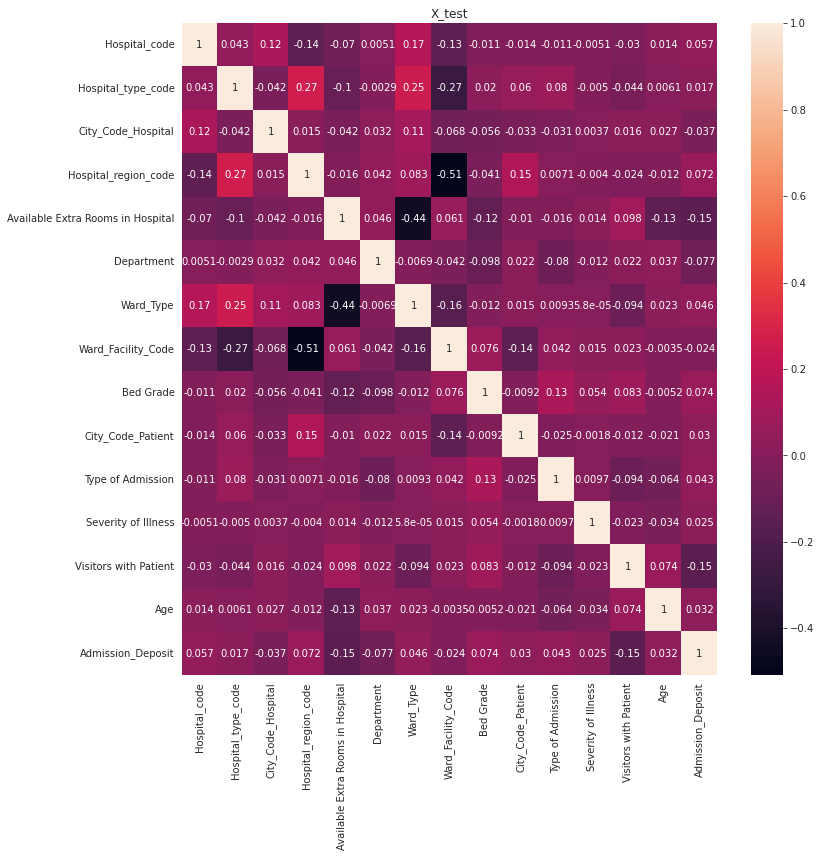

In [541]:
plt.figure(figsize=(12,12))
sns.heatmap(X_test.corr(), annot=True)
plt.title('X_test')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
plt.show()

LogisticRegression
0.5627590754930285


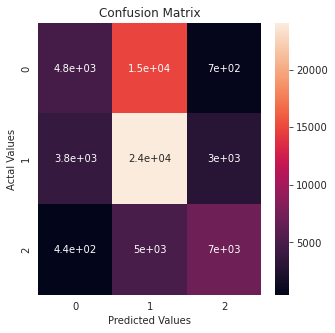

RandomForsetClassifier
0.5999874387639744


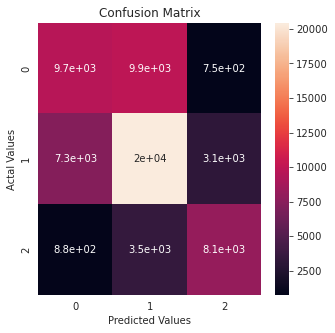

DecisionTreeClassifier
0.5237721391784952


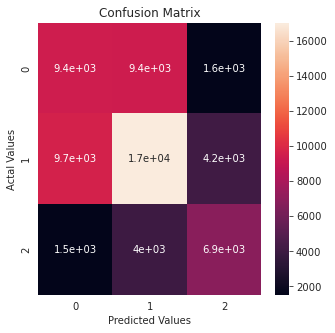

KNeighborsClassifier
0.5556462755935184


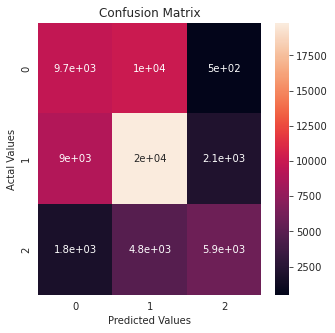

Learning rate set to 0.104963
0:	learn: 1.0554811	total: 8.76s	remaining: 2h 25m 46s
1:	learn: 1.0209018	total: 9.82s	remaining: 1h 21m 43s
2:	learn: 0.9934807	total: 9.98s	remaining: 55m 18s
3:	learn: 0.9692974	total: 10.3s	remaining: 42m 36s
4:	learn: 0.9491095	total: 10.9s	remaining: 36m 7s
5:	learn: 0.9327798	total: 11.4s	remaining: 31m 32s
6:	learn: 0.9188019	total: 12.9s	remaining: 30m 23s
7:	learn: 0.9061311	total: 13s	remaining: 26m 55s
8:	learn: 0.8957758	total: 13.2s	remaining: 24m 8s
9:	learn: 0.8861450	total: 13.2s	remaining: 21m 51s
10:	learn: 0.8779757	total: 13.3s	remaining: 19m 58s
11:	learn: 0.8708305	total: 13.4s	remaining: 18m 25s
12:	learn: 0.8644890	total: 13.5s	remaining: 17m 7s
13:	learn: 0.8584475	total: 13.6s	remaining: 15m 58s
14:	learn: 0.8537587	total: 13.8s	remaining: 15m 7s
15:	learn: 0.8494258	total: 13.9s	remaining: 14m 17s
16:	learn: 0.8455134	total: 14.1s	remaining: 13m 33s
17:	learn: 0.8422471	total: 14.2s	remaining: 12m 54s
18:	learn: 0.8392266	total

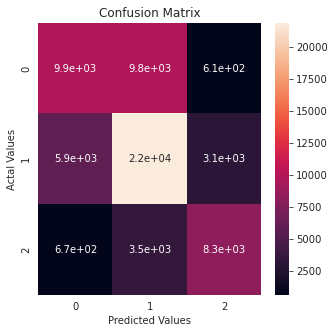

[21:26:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
0.6291609094334882


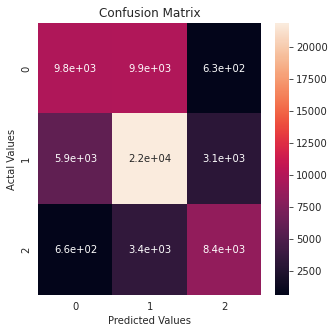

GaussianNB
0.5512812460746137


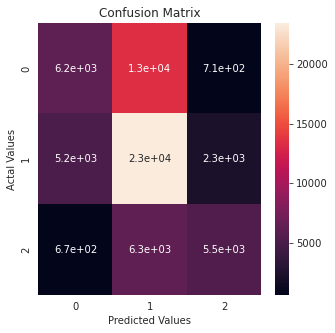

In [542]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier(), CatBoostClassifier(), XGBClassifier(), GaussianNB()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier', 'CatBoostClassifier', 'XGBClassifier', 'GaussianNB']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)
    cm = confusion_matrix(y_test, y_pred) 
    cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
#     cm = confusion_matrix(y_test, y_pred)  
#     cm_df = 
#     cm_df = pd.DataFrame(cm,
#                      index = ['Hospital_code', 'Hospital_type_code' , 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age' , 'Admission_Deposit']
#                      columns = ['Hospital_code', 'Hospital_type_code' , 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age' , 'Admission_Deposit'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
#     print(precision_score(y_test, y_pred, average='weighted'))
#     print(recall_score(y_test, y_pred, average='weighted'))

<AxesSubplot:>

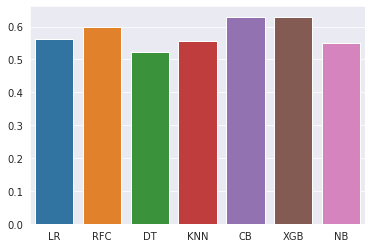

In [543]:
sns.barplot(x= ['LR','RFC','DT','KNN','CB','XGB','NB'],y=accuracy_scores)

In [544]:
X_test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
271461,0.773843,4,0,0,-0.169177,2,3,4,0,6,0,1,-0.727923,6,-0.240850
25034,0.426369,6,7,1,-1.025217,0,3,1,0,7,2,0,-0.727923,0,-0.157116
270808,-0.963527,4,0,0,0.686863,2,1,4,1,9,1,2,0.405826,5,-1.320190
293988,-0.847702,1,1,1,0.686863,1,1,3,1,16,2,1,0.405826,5,1.168826
126858,0.078895,0,6,1,0.686863,2,3,2,1,7,0,2,0.405826,5,-1.339514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,0.542194,0,5,0,-1.025217,2,3,5,2,4,1,1,0.405826,5,1.835938
25295,1.584615,5,7,1,-0.169177,2,3,1,1,21,1,0,-0.727923,5,1.731040
1584,1.121317,1,9,0,-1.881257,2,2,5,3,16,1,2,-0.161049,4,2.015368
6064,-0.963527,4,0,0,-1.025217,1,1,4,2,7,1,2,0.405826,4,0.035196


In [545]:
y_test

271461    1
25034     2
270808    0
293988    1
126858    1
         ..
20571     2
25295     0
1584      1
6064      1
208622    1
Name: Stay, Length: 63688, dtype: int64

**It is clear that CatBoostClassifier and XGBClassifier are best for the data.**

**But, now for hyperparameter tuning, CatBoostClassifier takes a lot of time. Thus, I decided to go with only tuning XGBClassifier model**

# Hyperparameter Tuning

In [37]:
params= {'objective':['binary:logistic'],
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,5,10,12],
              'subsample': [0.6,0.8,1.0],
              'colsample_bytree': [0.6,0.8,1.0], 'gamma': [0.5,1,1.5,2]}

xgb= XGBClassifier(n_estimators=600)

grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[12:16:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, objective=binary:logistic, subsample=0.8;, score=0.635 total time= 2.2min
[12:18:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5, objective=binary:logistic, subsample=0.8;, score=0.628 total time= 2.1min
[12:20:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [38]:
grid.best_score_

0.6258298318667999

In [39]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.6523363899007663
[[10400  9347   602]
 [ 5431 22649  2799]
 [  626  3337  8497]]
              precision    recall  f1-score   support

           0       0.63      0.51      0.57     20349
           1       0.64      0.73      0.68     30879
           2       0.71      0.68      0.70     12460

    accuracy                           0.65     63688
   macro avg       0.66      0.64      0.65     63688
weighted avg       0.65      0.65      0.65     63688



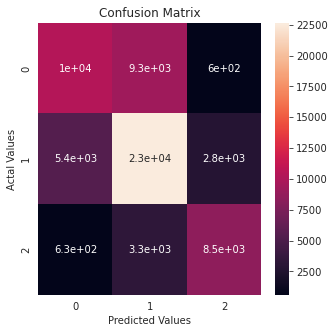

In [40]:
y_pred= grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [41]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(grid, filename)
 
# some time later...
 
# load the model from disk

In [162]:
filename = 'finalized_model.sav'
loaded_model = joblib.load(filename)

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = loaded_model.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6523363899007663
[[10400  9347   602]
 [ 5431 22649  2799]
 [  626  3337  8497]]
              precision    recall  f1-score   support

           0       0.63      0.51      0.57     20349
           1       0.64      0.73      0.68     30879
           2       0.71      0.68      0.70     12460

    accuracy                           0.65     63688
   macro avg       0.66      0.64      0.65     63688
weighted avg       0.65      0.65      0.65     63688



In [169]:
output = loaded_model.best_estimator_.predict(pd.DataFrame(pred_dict))
print(output)

[1]


In [164]:
pd.DataFrame(pred_dict)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,-0.847702,1.0,1.0,1.0,-0.169177,2.0,1.0,3.0,2.0,19.0,1.0,2.0,-0.161049,6.0,1.287526


In [138]:
X_test.iloc[0]

Hospital_code                        0.773843
Hospital_type_code                   4.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital   -0.169177
Department                           2.000000
Ward_Type                            3.000000
Ward_Facility_Code                   4.000000
Bed Grade                            0.000000
City_Code_Patient                    6.000000
Type of Admission                    0.000000
Severity of Illness                  1.000000
Visitors with Patient               -0.727923
Age                                  6.000000
Admission_Deposit                   -0.240850
Name: 271461, dtype: float64

In [43]:
X_test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
271461,0.773843,4,0,0,-0.169177,2,3,4,0,6,0,1,-0.727923,6,-0.240850
25034,0.426369,6,7,1,-1.025217,0,3,1,0,7,2,0,-0.727923,0,-0.157116
270808,-0.963527,4,0,0,0.686863,2,1,4,1,9,1,2,0.405826,5,-1.320190
293988,-0.847702,1,1,1,0.686863,1,1,3,1,16,2,1,0.405826,5,1.168826
126858,0.078895,0,6,1,0.686863,2,3,2,1,7,0,2,0.405826,5,-1.339514


In [44]:
X_train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
169829,-1.890124,2,4,2,-1.025217,2,3,5,1,6,2,2,-0.727923,2,1.098895
317121,1.005492,0,6,1,-0.169177,2,2,2,2,7,2,1,-0.727923,3,-0.842631
234941,-1.426825,0,5,0,1.542903,2,1,5,2,1,1,1,0.405826,1,0.121691
111248,0.078895,0,6,1,0.686863,2,2,2,1,7,0,2,-0.161049,3,-1.434290
255911,-0.731877,0,7,1,-0.169177,2,4,1,1,7,0,0,-0.727923,4,-1.553910


In [45]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,-1.195176,2,2,2,-0.169177,3,2,5,1,6,0,0,-0.727923,5,0.027835,0
1,-1.890124,2,4,2,-1.025217,3,3,5,1,6,1,0,-0.727923,5,0.987556,1
2,-0.963527,4,0,0,-1.025217,1,3,4,1,6,1,0,-0.727923,5,-0.124910,1
3,0.889668,1,1,1,-1.025217,3,2,3,1,6,1,0,-0.727923,5,2.200319,1
4,0.889668,1,1,1,-1.025217,3,3,3,1,6,1,0,-0.727923,5,0.623175,1


# Using the test data

In [51]:
test= pd.read_csv('/home/dipikagurtu/Desktop/project/test_data.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [52]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [53]:
test['Bed Grade'].fillna(statistics.mode(test['Bed Grade']),inplace=True)
test['City_Code_Patient'].fillna(statistics.mode(test['City_Code_Patient']),inplace=True)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137057 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [55]:
test.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [56]:
cat_cols.remove('Stay')
for col in cat_cols:
    
    test[col]= le.fit_transform(test[col])

In [57]:
test[num_cols]= ss.transform(test[num_cols].values)

In [58]:
test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.310544,2,2,2,-0.169177,2,3,0,1,1,0,2,-0.727923,7,-1.643165
1,1.237141,0,3,0,-1.025217,2,3,5,1,1,1,2,0.405826,7,-0.793862
2,0.889668,1,1,1,-0.169177,2,1,3,3,1,0,2,-0.161049,7,-0.357709
3,-1.426825,0,5,0,-0.169177,2,1,5,1,1,1,2,-0.161049,7,-0.651238
4,1.121317,1,9,0,-1.025217,2,2,5,1,1,1,2,0.405826,7,-0.662280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,-0.847702,1,1,1,0.686863,1,1,3,2,2,0,1,0.405826,4,1.317891
137053,0.773843,4,0,0,-1.025217,3,2,4,3,6,0,2,-0.727923,0,-1.261301
137054,1.352966,2,2,2,-1.025217,1,2,0,3,11,2,1,-0.727923,0,2.124866
137055,-1.542650,0,0,0,-1.025217,1,2,4,3,9,1,1,-0.727923,4,0.509996


In [59]:
predictions= grid.best_estimator_.predict(test)

# Final Predictions

In [60]:
np. set_printoptions(threshold=np. inf)
print(predictions)

[0 2 1 1 2 1 1 0 1 1 1 2 1 1 1 0 0 1 1 1 1 2 0 1 2 1 1 0 1 1 0 0 2 1 1 1 0
 1 0 2 0 0 1 1 0 1 0 1 1 1 2 2 2 2 2 2 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 2 0 1 1 0 0 1 1 0 1 0 1 0 0 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 1 0 1 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 2 1 1 1 0 1 1 1 0 1 1 1 2 1 1 1 1 0 1 0 0 0 0 1 1 2 2 1
 1 1 2 0 0 1 1 1 1 1 1 1 1 1 0 2 2 0 1 2 1 2 2 1 1 2 1 1 2 2 2 2 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 2 1 2 0 1 2 1 1 2 1 0 1 1 1 1 1 2 1 2 1 1 1
 1 0 1 1 2 2 2 0 0 0 2 0 1 1 2 1 1 1 2 1 1 1 0 2 1 1 2 2 2 2 1 0 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 2 2 1 1 1
 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 1 1 0 1 2 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 0 1 0 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 1 1
 2 1 1 0 2 1 0 1 0 1 1 1 

<AxesSubplot:ylabel='count'>

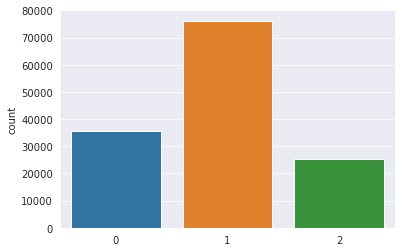

In [61]:
sns.countplot(predictions)

In [72]:
submission= pd.read_csv('/home/dipikagurtu/Desktop/project/sample_sub.csv')

In [73]:
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [74]:
submission['Stay']= predictions

In [75]:
submission['Stay']= submission['Stay'].replace({0:'10-20 days', 1:'40-50 days', 2:'90-100 days'})

In [76]:
submission

,case_id,Stay
0,318439,10-20 days
1,318440,90-100 days
2,318441,40-50 days
3,318442,40-50 days
4,318443,90-100 days
...,...,...
137052,455491,40-50 days
137053,455492,10-20 days
137054,455493,40-50 days
137055,455494,10-20 days


# Upvote and Comment if you liked my Notebook